In [1]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json
import os
!pip install h5py

2.13.1
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

(60000, 28, 28)

In [3]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

TensorShape([60000, 28, 28, 1])

In [4]:
lenet_5_model = keras.models.Sequential([
    keras.Input(shape=train_x[0].shape), # Input layer
    keras.layers.Conv2D(6, kernel_size=5, strides=1, activation='tanh', padding='same'), # C1
    keras.layers.AveragePooling2D(pool_size=(2, 2)), # S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), # C3
    keras.layers.AveragePooling2D(pool_size=(2, 2)), # S4
    keras.layers.Flatten(), # Flatten
    keras.layers.Dense(120, activation='tanh'), # C5
    keras.layers.Dense(84, activation='tanh'), # F6
    keras.layers.Dense(10, activation='softmax') # Output layer
])


In [5]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [6]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2261 - accuracy: 0.9327 - val_loss: 0.0895 - val_accuracy: 0.9754
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0889 - accuracy: 0.9728 - val_loss: 0.0535 - val_accuracy: 0.9840
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0594 - accuracy: 0.9817 - val_loss: 0.0380 - val_accuracy: 0.9904
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0461 - accuracy: 0.9855 - val_loss: 0.0317 - val_accuracy: 0.9928
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0354 - accuracy: 0.9885 - val_loss: 0.0275 - val_accuracy: 0.9920


In [7]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 2s 6ms/step - loss: 0.0511 - accuracy: 0.9849


[0.05110897868871689, 0.9848999977111816]

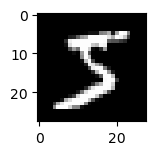

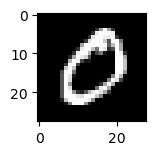

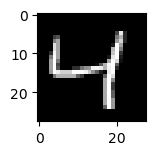

In [8]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [10]:
import tensorflow as tf
import h5py
print(tf.__version__)  # Ensure it's 2.13.1
print(h5py.__version__)  # Should match installed version


2.13.1
3.8.0


In [12]:
lenet_5_model.save('lenet_5_model.h5')


C:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:

lenet_5_model.save('lenet_5_model.keras')

print(os.listdir('.'))  # Liste des fichiers dans le répertoire actuel


['.git', '.gitignore', '.ipynb_checkpoints', 'biases_layer_0.bin', 'biases_layer_2.bin', 'biases_layer_5.bin', 'biases_layer_6.bin', 'biases_layer_7.bin', 'fashionmnist_model.json', 'LeNet5', 'LeNet5.ipynb', 'lenet_5_model.h5', 'lenet_5_model.keras', 'main.cu', 'matrix_operations.exe', 'matrix_operations.exp', 'matrix_operations.lib', 'printMNIST.cu', 'printMNIST.exe', 'printMNIST.exp', 'printMNIST.lib', 'README.md', 'train-images.idx3-ubyte', 'weights_layer_0.bin', 'weights_layer_2.bin', 'weights_layer_5.bin', 'weights_layer_6.bin', 'weights_layer_7.bin']


In [14]:
lenet_5_model.save("my.h5")

In [15]:
lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [16]:
json_model = lenet_5_model.to_json()

In [17]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [18]:
lenet_5_model.save_weights('FashionMNIST_weights.h5')

In [19]:
lenet_5_model.layers[0].get_weights()[0]

array([[[[-0.3902967 , -0.13272628,  0.13941945, -0.10985923,
          -0.13583525, -0.04355846]],

        [[-0.22852767, -0.02362846,  0.33650032, -0.35921463,
          -0.19405973, -0.05409855]],

        [[-0.18053542, -0.14408349,  0.2921454 , -0.34989375,
          -0.22376582,  0.3833943 ]],

        [[-0.3626143 ,  0.26750877, -0.10831389, -0.28575486,
          -0.11939795,  0.37640867]],

        [[-0.358549  ,  0.19134206, -0.11661831, -0.19824503,
          -0.19492535, -0.1157228 ]]],


       [[[-0.07248505, -0.17035735,  0.3290738 , -0.13757536,
          -0.42789072, -0.16373561]],

        [[ 0.07301694, -0.22822028,  0.52422625, -0.07423278,
          -0.57307345,  0.4232313 ]],

        [[-0.1179457 ,  0.04038887,  0.41415536, -0.01529332,
          -0.63034976,  0.4938441 ]],

        [[ 0.0080129 ,  0.40954384, -0.06260637, -0.0866897 ,
          -0.6235114 ,  0.39918375]],

        [[-0.25877064,  0.5496686 , -0.0016272 , -0.09198371,
          -0.5162894 ,  0.1